#### Named Entity Recognition

In [1]:
!pip install spacy
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 11.9/11.9 MB 879.2 kB/s eta 0:00:00
  Using cached pathy-0.6.2-py3-none-any.whl (42 kB)
     ---------------------------------------- 1.3/1.3 MB 886.7 kB/s eta 0:00:00
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
     ---------------------------------------- 2.1/2.1 MB 900.6 kB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB ? eta 0:00:00
  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
     ------------------------------------ 481.4/481.4 kB 773.7 kB/s eta 0:00:00
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached confection-0.0.3-py3-none-any.whl (32 kB)
     ---------------------------------------- 7.0/7.0 MB 761.2 kB/s eta 0:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [2]:
###Execute below command through anaconda command prompt
!python -m spacy download en


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.8/12.8 MB 744.3 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-10-25 22:30:32.578676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-25 22:30:32.580624: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-25 22:30:32.590637: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Slmsshk
2022-10-25 22:30:32.590725: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Slmsshk


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
import pandas
book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)

C:\Users\Slmss\AppData\Local\Temp\ipykernel_9360\2823331210.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [5]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [6]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [7]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [8]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [9]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [10]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['go', 'windows', 'term', 'love', 'battery', 'life', 'look', '😍', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'use']


In [11]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

word  count
0   office      3
1     want      2
2  battery      2
3    store      2
4     have      2
5  install      2
6  version      2
7     file      2
8     play      2
9      60k      1

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

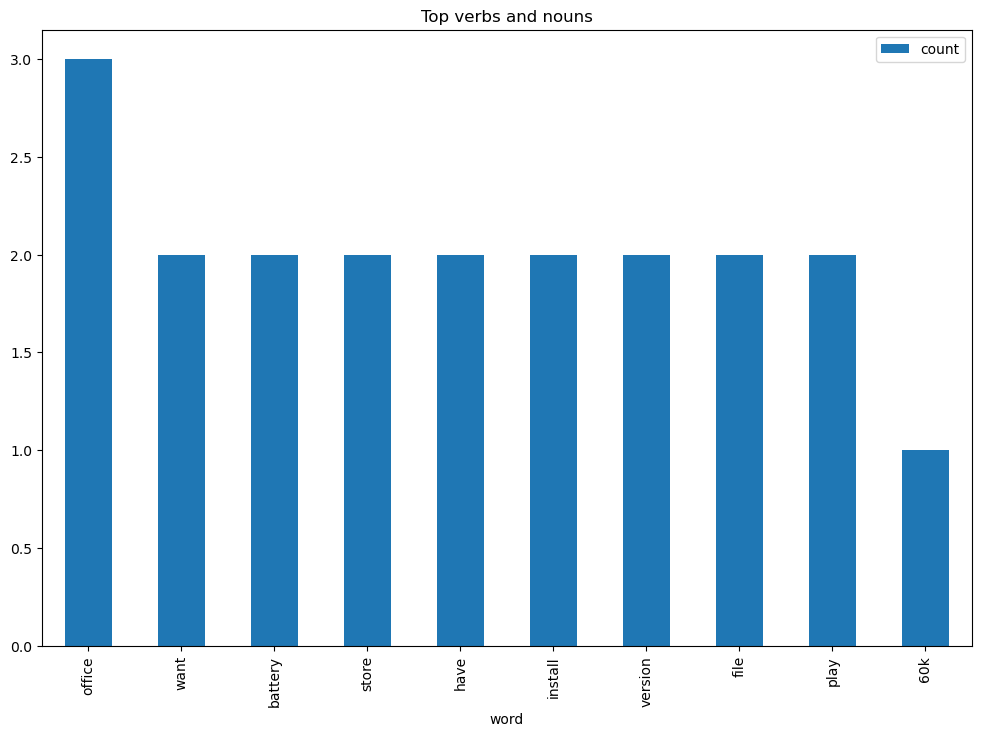

In [12]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

### Emotion Mining

In [13]:
#Sentiment analysis
afinn = pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [14]:
afinn[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

C:\Users\Slmss\AppData\Local\Temp\ipykernel_9360\388786946.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Slmss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [18]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    It's amazing..... battery last around 10 -12 h...
1                        Got it in 50k in Diwali sale.
2    Technically good laptop.Good News.luxury produ...
3       Terrific sense of possession & pride.Bad News.
4    Problems will be there if you are switching fr...
..                                                 ...
182  You can get one of the best movie experiences ...
183                        Overall I would it a 4.5/5.
184  I got a great deal on this laptop, which I hav...
185  I got it not only on discount but also was abl...
186  Laptop works really well, it was a good purchase!

[187 rows x 1 columns]

In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [20]:
affinity_scores




{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [21]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [22]:
# test that it works
calculate_sentiment(text = 'Amazed')

Amazed


2

In [23]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.
Got it in 50k in Diwali sale.
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Terrific sense of possession & pride.Bad News.
Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!
), all printers are not compatible (e.g.
the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working

?, god damn it apple (Though its not bad, have seen GeForce 940MX at the same price)No Force trackpadBezels are way too thick in today's standardsNo thunderbolt 3 or Usb CCan't detect Android Devices until Android Device Explorer is installedThe Storage is less!
(128 GB, will upgrade to 256 GB in a few years)***My Verdict***This devices is for them who want Battery and Power, and people who want to do Video Editing on Final Cut Pro X, if anyone has a heat up issue than you should Call apple Support and visit one service center immediately to get your laptop checked!
Though the graphics is OK from my view, apple could have given better graphics like the radeon vega 8 graphics or Intel Iris Plus or Pro for a laptop that is so expensive!
Everything else is Great!
And MacOS is not that hard, i easily use both my Lenovo Gaming PC and my apple macbook air easily!
Go for it if you are in the criteria I explained above!
For hard-core video editing I would recommend atleast an iMac 4k or MacBoo

In [24]:
sent_df

sentence  sentiment_value
0    It's amazing..... battery last around 10 -12 h...                7
1                        Got it in 50k in Diwali sale.                0
2    Technically good laptop.Good News.luxury produ...                5
3       Terrific sense of possession & pride.Bad News.                4
4    Problems will be there if you are switching fr...              -11
..                                                 ...              ...
182  You can get one of the best movie experiences ...                3
183                        Overall I would it a 4.5/5.                0
184  I got a great deal on this laptop, which I hav...                3
185  I got it not only on discount but also was abl...                0
186  Laptop works really well, it was a good purchase!                3

[187 rows x 2 columns]

In [25]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [26]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
106  I am satisfied to get the marvel of a tech in ...                5   
110  The build is super strong, the operating syste...                5   
45   Now my mac is perfectly fine : Got the Apple M...                5   
46   Ships with macOS sierra but update is availabl...                6   
64   I hope this comment can help to save somebody’...                6   
103  The switch was inspired by the awesome reviews...                6   
59   I use this for music production and it works a...                7   
0    It's amazing..... battery last around 10 -12 h...                7   
151  ..So now I m working with the external keyboar...               17   
86   All are Gud.. For now.. Apple,apple,apple, tha...               24   

     word_count  
106          13  
110          10  
45           27  
46           86  
64           10  
103          13  
59           30  
0            17  
151         113  
86          184

In [27]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.930481
std        3.350571
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [28]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
1                       Got it in 50k in Diwali sale.                0   
4   Problems will be there if you are switching fr...              -11   
5            ), all printers are not compatible (e.g.                0   
7   you need to spend extra for an external CD wri...                0   
10  Marketing strategy for Indian market, if at al...               -3   

    word_count  
1            7  
4           65  
5            7  
7           16  
10          15

In [29]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!'

In [30]:
sent_df['index']=range(0,len(sent_df))

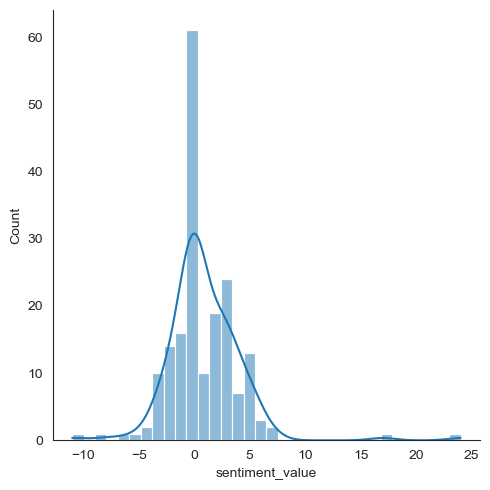

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

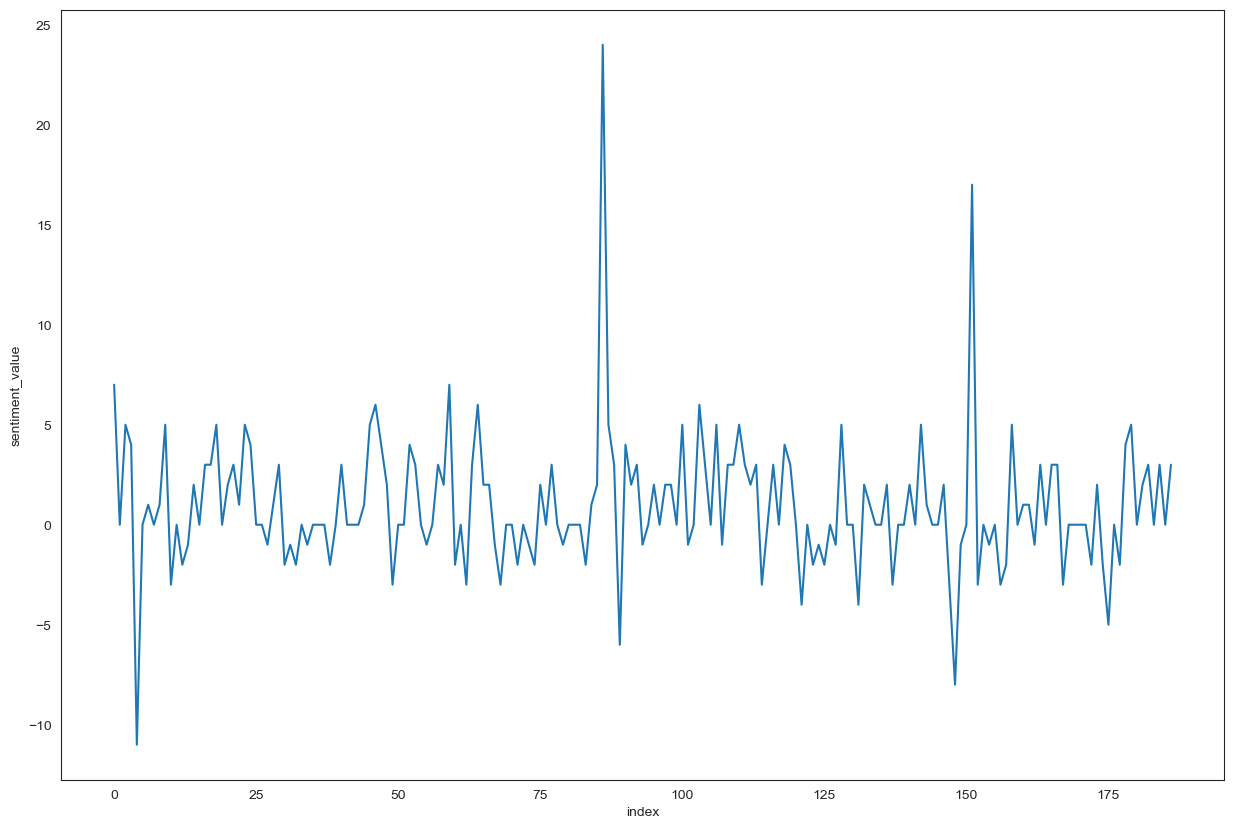

In [32]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

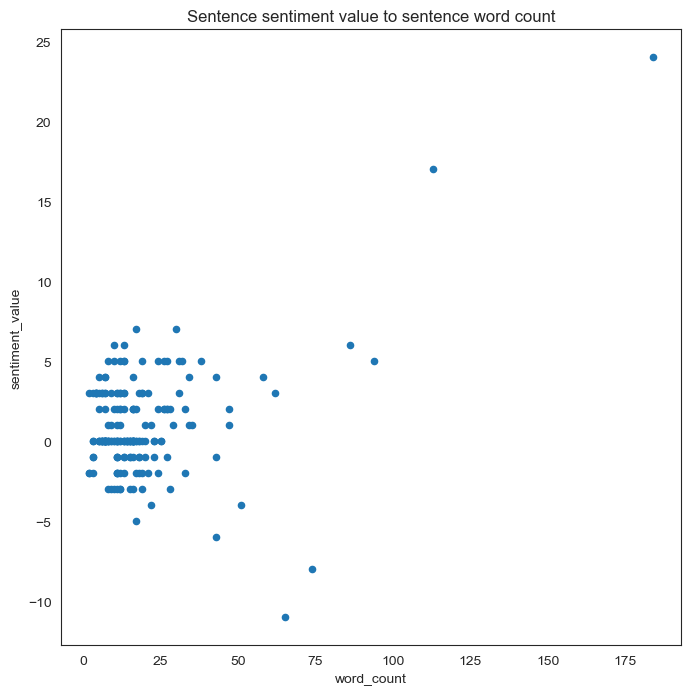

In [33]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

<h1><center> ꧁༺ȶɦǟռӄ ʏօʊ༻꧂